In [2]:
import git
import os

# Get git repository root
repo = git.Repo(".", search_parent_directories = True)
# Update notebook working dir to repository root
os.chdir(repo.working_tree_dir)

In [3]:
import numpy as np
import pandas as pd
from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt

with open(f"python/to_mne.py", "r") as file:
    exec(file.read())

In [4]:
samples = pd.read_csv("sample_sheet.csv")
sample = samples.iloc[0]

sfreq = 20_000

file = f"output/movement-s1-m1/{sample['AnimalID']}/{sample['CellName']}/vm/filter.csv"
sample_data = np.array(pd.read_csv(file, index_col = 0))

file = f"output/movement-s1-m1/{sample['AnimalID']}/{sample['CellName']}/movement_filtered.csv"
movement = pd.read_csv(file)

file = f"output/movement-s1-m1/{sample['AnimalID']}/{sample['CellName']}/rest_filtered.csv"
rest = pd.read_csv(file)

In [12]:
event_fft_freq = []
movement_data = []

for _, episode in movement.iterrows():
    channel = episode["Channel"]
    start = episode["EventStart"]
    end = int(episode["EventStart"] + sfreq * 0.5)

    if end > episode["EventEnd"]:
        continue

    y = sample_data[channel, start:end]

    fft_res = np.abs(rfft(y))
    event_fft_freq = rfftfreq(len(y), 1 / 20_000)
    movement_data.append(fft_res)

movement_data = np.array(movement_data)

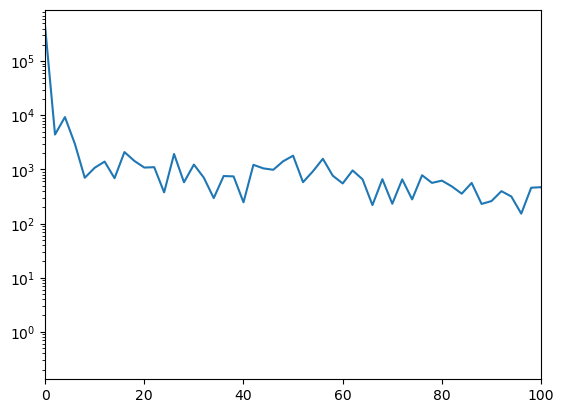

In [15]:
plt.plot(event_fft_freq, fft_res)
plt.xlim(0, 100)
plt.yscale("log")
plt.show()

In [8]:
rest_data = []

for _, episode in rest.iterrows():
    channel = episode["Channel"]
    start = episode["EventStart"]
    end = int(episode["EventStart"] + sfreq * 0.5)

    if end > episode["EventEnd"]:
        continue
    
    y = sample_data[channel, start:end]
    fft_res = rfft(y)

    rest_data.append(fft_res)

rest_data = np.array(rest_data)

/Users/ieva/miniconda3/envs/movement-s1-m1-mne/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ieva/miniconda3/envs/movement-s1-m1-mne/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


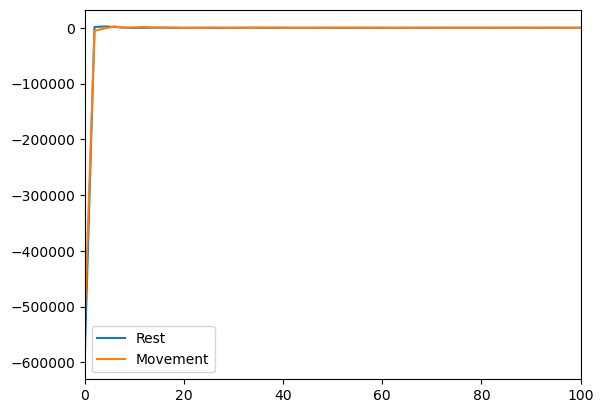

In [9]:
plt.plot(event_fft_freq, np.mean(rest_data, axis = 0), label = "Rest")
plt.plot(event_fft_freq, np.mean(movement_data, axis = 0), label = "Movement")
plt.xlim(0, 100)
plt.legend()
plt.show()